In [9]:
import os
import json
from dataclasses import asdict
from dotenv import load_dotenv
from openai import OpenAI
from IPython.display import Image
from protocol import Env,Message
from agents import Group
from agent import Agent

 
[2024-12-11 11:47:57][INFO]: All agents are fully connected


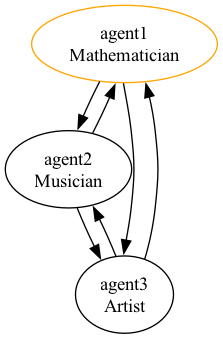

In [10]:
# load the environment variables
load_dotenv()
# create a model client
model_client = OpenAI()
# create an environment
env = Env(
    description="This is a test environment",
    members=[
        Agent(name="agent1", role="Mathematician", description="Transfer to me if you need help with math.", dify_access_token=os.environ.get("AGENT1_ACCESS_TOKEN")),
        Agent(name="agent2", role="Musician", description="Transfer to me if you need help with music.", dify_access_token=os.environ.get("AGENT2_ACCESS_TOKEN")),
        Agent(name="agent3", role="Artist", description="Transfer to me if you need help with art.", model_client=model_client)
    ]
)
# create a group of agents
g = Group(env=env,model_client=model_client,verbose=True)

Image(g.draw_relations())

In [3]:
g.update_group_messages(Message(sender="user", action="talk", result="Can anyone help me with math? 2+2=?"))
g.update_group_messages(Message(sender="agent1", action="solve", result="2+2=4"))
g.update_group_messages(Message(sender="user", action="talk", result="Can anyone help me with music?"))

In [4]:
g.group_messages.context
# g.current_agent

[Message(sender='user', action='talk', result='Can anyone help me with math? 2+2=?'),
 Message(sender='agent1', action='solve', result='2+2=4'),
 Message(sender='user', action='talk', result='Can anyone help me with music?')]

In [5]:
# Do handoff
# After handoff the current agent will be updated to the one who will speak next
next_agent = g.handoff(next_speaker_select_mode="auto2",include_current=True,model="gpt-4o-mini")

# Print the group message protocol instance
print('-'*50)
print("Below Is The Group Message Protocol Instance")
print('-'*50)
print(json.dumps(asdict(g.group_messages), indent=4))
# print('-'*50)
# print("Below Message Send To `{}` who is {}".format(g.current_agent,g.members_map[g.current_agent].role))
# print('-'*50)
# print(g._build_send_message(g.group_messages,cut_off=3,send_to=g.current_agent))

 
[2024-12-11 11:41:12][INFO]: handoff from agent1 to agent2 by using auto2 mode
--------------------------------------------------
Below Is The Group Message Protocol Instance
--------------------------------------------------
{
    "group_id": "d4544435-64ae-492e-bcd3-9b3156204a8a",
    "env": {
        "description": "This is a test environment",
        "members": [
            {
                "name": "agent1",
                "role": "Mathematician",
                "description": "Transfer to me if you need help with math."
            },
            {
                "name": "agent2",
                "role": "Musician",
                "description": "Transfer to me if you need help with music."
            },
            {
                "name": "agent3",
                "role": "Artist",
                "description": "Transfer to me if you need help with art."
            }
        ],
        "relationships": {
            "agent1": [
                "agent2",
            

In [6]:
g.update_group_messages(Message(sender="user", action="talk", result="How about music for reading?"))
_ = g.call_agent(next_speaker_select_mode="auto2",include_current=True,model="gpt-4o-mini")

 
[2024-12-11 11:41:20][INFO]: Call agent agent2
 
[2024-12-11 11:41:20][INFO]: Agent agent2 response: Certainly! If you're looking for music that complements reading, I would recommend exploring genres that are generally soothing and unobtrusive. Here are a few suggestions:

1. **Classical Music**: Compositions by artists like Johann Sebastian Bach, Claude Debussy, or Erik Satie can create a serene atmosphere that enhances concentration. Pieces such as Bach's "Goldberg Variations" or Debussy's "Clair de Lune" are particularly effective.

2. **Lo-fi Hip Hop**: This genre has gained popularity for its laid-back beats and instrumental focus, making it an excellent background for reading. You can find playlists on platforms like YouTube or Spotify specifically curated for studying or relaxation.

3. **Ambient Music**: Artists like Brian Eno create soundscapes that can help you immerse yourself in your reading without distraction. His album "Music for Airports" is a classic in this genre.


In [7]:
g.update_group_messages(Message(sender="user", action="talk", result="Let's discuss what is beauty."))
_ = g.call_agent(next_speaker_select_mode="auto2",include_current=False,model="gpt-4o-mini")

 
[2024-12-11 11:41:25][INFO]: handoff from agent2 to agent3 by using auto2 mode
 
[2024-12-11 11:41:32][INFO]: Call agent agent3
 
[2024-12-11 11:41:32][INFO]: Agent agent3 response: Beauty is a multifaceted concept that has been explored by artists, philosophers, and thinkers across cultures and epochs. At its core, beauty often evokes a sense of pleasure, harmony, and appreciation for aesthetic experiences. Here are a few perspectives to consider:

1. **Subjective Experience**: Beauty can be highly personal and subjective. What one person finds beautiful, another may not. This subjectivity invites us to explore a wide range of artistic expressions and interpretations.

2. **Nature and Form**: In visual art, beauty can be found in the proportions, colors, and forms of objects. Many artists strive to capture the beauty of nature, whether it be through realism or abstraction. Think of the way Impressionists painted light and its effects on landscapes.

3. **Emotional Resonance**: Beaut

In [8]:
_ = g.call_agent(next_speaker_select_mode="auto2",include_current=False,model="gpt-4o-mini")

 
[2024-12-11 11:41:35][INFO]: handoff from agent3 to agent1 by using auto2 mode
 
[2024-12-11 11:41:42][INFO]: Call agent agent1
 
[2024-12-11 11:41:42][INFO]: Agent agent1 response: Beauty is indeed a complex and multifaceted concept that can be viewed through various lenses, including mathematical elegance. In mathematics, beauty often manifests in the simplicity and symmetry of equations, the harmony in geometric structures, and the profound connections between different areas of the discipline.

1. **Mathematical Elegance**: Just as artists seek balance and proportion, mathematicians appreciate the elegance of a succinct proof or a beautifully crafted theorem. For instance, Euler's identity \(e^{i\pi} + 1 = 0\) is celebrated for its simplicity and the profound relationships it encapsulates between fundamental mathematical constants.

2. **Patterns and Symmetry**: In both nature and mathematics, symmetry is often associated with beauty. The Fibonacci sequence and the golden ratio a

In [9]:
_ = g.call_agent(next_speaker_select_mode="auto2",include_current=False,model="gpt-4o-mini")

 
[2024-12-11 11:41:59][INFO]: handoff from agent1 to agent2 by using auto2 mode
 
[2024-12-11 11:42:08][INFO]: Call agent agent2
 
[2024-12-11 11:42:08][INFO]: Agent agent2 response: Beauty is a fascinating topic that transcends various disciplines, including music. As a musician, I find that beauty in music often emerges through melody, harmony, rhythm, and emotional expression. Here are some thoughts on how beauty manifests in the realm of music:

1. **Melodic Contours**: A beautiful melody can evoke deep emotions and paint vivid imagery in the listener's mind. Think of the soaring lines in classical compositions like Schubert's "Ave Maria" or the haunting simplicity of a folk tune. The way notes interact to create memorable phrases is a crucial aspect of musical beauty.

2. **Harmonic Richness**: Harmony adds depth and complexity to music. The juxtaposition of different chords can create tension and resolution, leading to moments of profound beauty. Take for instance the lush harmo

In [10]:
_ = g.call_agent(agent="agent1",model="gpt-4o-mini")

 
[2024-12-11 11:42:09][INFO]: manually set the current agent to agent1
 
[2024-12-11 11:42:15][INFO]: Call agent agent1
 
[2024-12-11 11:42:15][INFO]: Agent agent1 response: Beauty, as discussed by both artists and musicians, transcends individual disciplines and finds common ground in emotional expression, cultural influences, and subjective experiences. Here are some reflections on the interplay between beauty and mathematics, drawing parallels to the insights shared by agent2 and agent3:

1. **Emotional Connection**: Just like music can evoke strong emotions through melodies and harmonies, mathematical beauty can stir a sense of wonder and satisfaction. For instance, discovering a simple yet powerful solution to a complex problem can produce feelings akin to those experienced when listening to a moving piece of music.

2. **Cultural Contexts**: Similar to how different cultures shape the perception of beauty in art and music, the appreciation of mathematical concepts varies across 

## Add and Delete Member Dynamicly 

Like people come and go in some place or some group

 
[2024-12-11 11:48:01][INFO]: Self-defined relationships


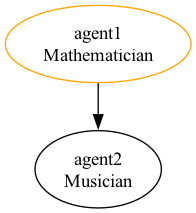

In [11]:
# load the environment variables
load_dotenv()
# create a model client
model_client = OpenAI()
# create an environment
env = Env(
    description="This is a test environment",
    members=[
        Agent(name="agent1", role="Mathematician", description="Transfer to me if you need help with math.", dify_access_token=os.environ.get("AGENT1_ACCESS_TOKEN")),
        Agent(name="agent2", role="Musician", description="Transfer to me if you need help with music.", dify_access_token=os.environ.get("AGENT2_ACCESS_TOKEN"))
    ],
    relationships={"agent1": ["agent2"]}
)
# create a group of agents
g = Group(env=env,model_client=model_client,verbose=True)

Image(g.draw_relations())

 
[2024-12-11 11:48:02][INFO]: Self-defined relationships
 
[2024-12-11 11:48:02][INFO]: Succesfully add member agent3
 
[2024-12-11 11:48:02][INFO]: Self-defined relationships
 
[2024-12-11 11:48:02][INFO]: Succesfully add member agent4


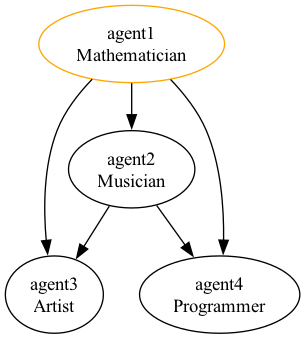

In [12]:
g.add_member(
        Agent(
            name="agent3", role="Artist",
            description="Transfer to me if you need help with art.", dify_access_token=os.environ.get("AGENT3_ACCESS_TOKEN")
            ),
            [("agent1","agent3"),("agent2","agent3")]
    )

g.add_member(
        Agent(
            name="agent4", role="Programmer",
            description="Transfer to me if you need help with programming.", model_client=model_client
            ),
            [("agent1","agent4"),("agent2","agent4")]
    )

Image(g.draw_relations())

 
[2024-12-11 11:48:02][INFO]: Self-defined relationships
 
[2024-12-11 11:48:02][INFO]: Successfully delete member agent2


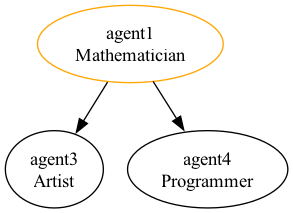

In [13]:
g.delete_member("agent2")
Image(g.draw_relations())

 
[2024-12-11 11:48:04][INFO]: handoff from agent1 to agent3 by using auto2 mode


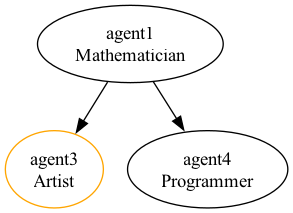

In [14]:

g.update_group_messages(Message(sender="user", action="talk", result="can you recommend me a art work?"))
next_agent = g.handoff(next_speaker_select_mode="auto2",include_current=True,model="gpt-4o-mini")
Image(g.draw_relations())

 
[2024-12-11 11:48:04][INFO]: Self-defined relationships
 
[2024-12-11 11:48:04][INFO]: Succesfully add member agent5


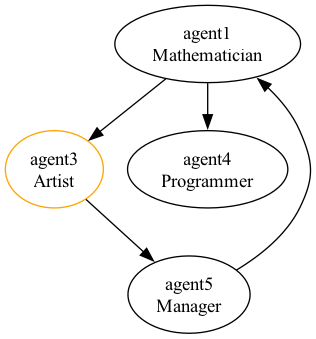

In [15]:
g.add_member(
        Agent(
            name="agent5", role="Manager",
            description="Transfer to me if you don't know who to transfer to.", model_client=model_client
            ),
            [("agent3","agent5"),("agent5","agent1")]
    )
Image(g.draw_relations())

 
[2024-12-11 11:48:28][INFO]: handoff from agent3 to agent5 by using auto2 mode
 
[2024-12-11 11:48:30][INFO]: handoff from agent5 to agent1 by using auto2 mode


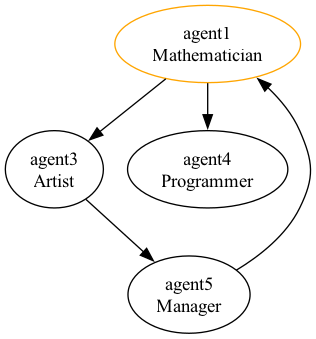

In [16]:

g.update_group_messages(Message(sender="user", action="talk", result="can you help me with math?"))
next_agent = g.handoff(next_speaker_select_mode="auto2",include_current=True,model="gpt-4o-mini")
Image(g.draw_relations())

## Task

In [43]:
# load the environment variables
load_dotenv()
# create a model client
model_client = OpenAI()
# tools
def get_my_mood():
    """Get the mood of user."""
    return "I am so happy today!"

def get_current_time():
    """Get the current time."""
    return "It is 12:00 PM now."

def get_weather():
    """ Get the weather."""
    return "It is sunny today."

# create an environment
env = Env(
    description="This is a test environment",
    members=[
        Agent(name = "agent1",
              role = "Personal Assistant", 
              description = "Transfer to me if you need help with personal stuff.",
              model_client = model_client,
              tools = [get_my_mood,get_current_time,get_weather],
              verbose = True),

        Agent(name="agent2", 
              role="Musician", 
              description="Transfer to me if you need help with music.", 
              dify_access_token=os.environ.get("AGENT2_ACCESS_TOKEN"),
              verbose=True)
    ]
)
# create a group of agents
g = Group(env=env,model_client=model_client,verbose=True)

 
[2024-12-10 18:27:32][INFO]: All agents are fully connected


In [44]:
task = "what kind of music is good for right now consider today's weather and my current mood?"
_ = g.task(task,model="gpt-4o-mini",strategy="sequential",entry_agent="agent1")

 
[2024-12-10 18:27:41][INFO]: Start task: what kind of music is good for right now consider today's weather and my current mood?
 
[2024-12-10 18:27:41][INFO]: ===> Step 1
 
[2024-12-10 18:27:41][INFO]: no handoff needed, stay with agent1 judge by order mode
 
[2024-12-10 18:27:41][INFO]: Calling OpenAI agent
 
[2024-12-10 18:27:45][INFO]: Call agent agent1
 
[2024-12-10 18:27:45][INFO]: Agent agent1 response: By using the tool 'get_weather' with the arguments {}, the result is 'It is sunny today.'.
 
[2024-12-10 18:27:45][INFO]: Agent agent1 response: By using the tool 'get_my_mood' with the arguments {}, the result is 'I am so happy today!'.
 
[2024-12-10 18:27:45][INFO]: Agent agent1 response: Given that it is sunny today and you are feeling so happy, I would recommend upbeat and cheerful music. Genres like pop, reggae, or even some light acoustic may enhance your mood further. Artists like Pharrell Williams, Bob Marley, or Jack Johnson could be great choices for a sunny day filled